In [1]:
import sys
sys.path.append('../30_data_tools/')
sys.path.append('../60_gebastel/Musterueberlagerung/')
sys.path.append('../60_gebastel/process_masks/')

In [2]:
import sqlite3
import pandas as pd
from PIL import Image

In [3]:
import json
import numpy as np

In [4]:
from helper import load_dotenv

In [5]:
from pattern_creation import get_pattern_style, get_pattern_img_by_style
from apply_pattern import apply_pattern
from file_interaction import get_related_filepath, open_img
from generic_image_db_interaction import load_mask_configuration_file
from mask_functions import get_config as get_mask_config, load_masks, get_whole_mask

In [6]:
dotenv = load_dotenv()

In [7]:
with open('../60_gebastel/Musterueberlagerung/configurations/config_pullover.json') as config_file:
    config = json.load(config_file)

In [29]:
mask_config = load_mask_configuration_file(
    '24-03-05-01_randomTrainPages',
    '141465.g39_naturapotheke_print_001-304.p244',
    'soft_light',
    1,
    'H7_8crh4Ow'
)
mask_config['pattern'] = 'perlin_noise.5.33.9.df1;01.DIAMOND'

for effect in mask_config['effects']:
    if effect['effect_name'] == 'wave_deform' and 'wave_length' in effect:
        effect['wave_configurations'] = [(effect['wave_length'], effect['wave_depth'])]

In [ ]:
mask_config = load_mask_configuration_file(
    '24-03-05-01_randomTrainPages',
    '617531.CD185_154155.p2',
    'soft_light',
    1,
    '1tqZhRP9Ah'
)
mask_config['pattern'] = 'perlin_noise.5.33.5.df1;01.LINE'

In [30]:
img_path = get_related_filepath(
    mask_config['job'],
    f'halftone{ dotenv["LOFI_DPI"] }dpi',
    f'{ mask_config["pdf_filename"] }.4c.jpg'
)

masks_path = get_related_filepath(
    mask_config['job'],
    f'halftone{ dotenv["LOFI_DPI"] }dpi',
    f'{ mask_config["pdf_filename"] }.masks.pkl'
)

img = open_img( img_path )
masks = load_masks( masks_path )
m = [m for m in masks if m['bbox'] == mask_config['bbox']][0]
pattern_img = get_pattern_img_by_style( mask_config, config )

In [31]:
out_img = np.array(img)
out_img[:,:,3],pattern_mask, ssim_value_K = apply_pattern(
    out_img[:,:,3],
    pattern_img,
    m,
    mask_config['pattern_position'],
    config,
    method=mask_config['method'],
    overlay_weight=1,
    #overlay_weight=config['overlay_weight'] * config['overlay_intensity'][3],
    log=lambda val: None
)

1.9395436893203883
1.9395436893203883


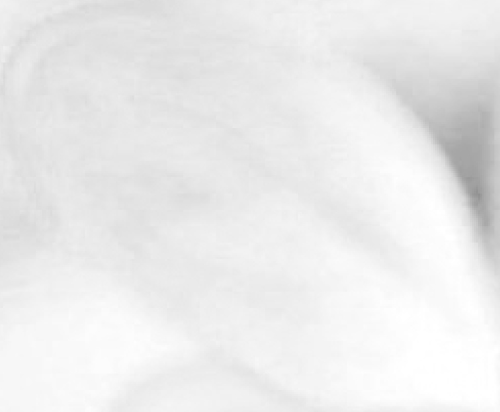

In [39]:
Image.fromarray(255 - np.array(img)[:,:,3]).crop((
    m['bbox'][0],m['bbox'][1],
    m['bbox'][0]+m['bbox'][2],m['bbox'][1]+m['bbox'][3]
))

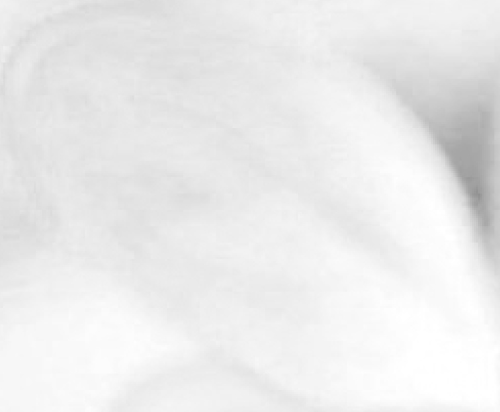

In [37]:
Image.fromarray(255 - out_img[:,:,3]).crop((
    m['bbox'][0],m['bbox'][1],
    m['bbox'][0]+m['bbox'][2],m['bbox'][1]+m['bbox'][3]
))

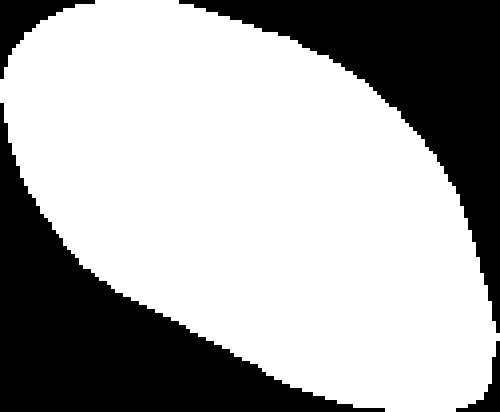

In [34]:
Image.fromarray(m['mask'])

In [35]:
ssim_value_K

0.18829960906585294

In [ ]:
img.crop((
    m['bbox'][0],m['bbox'][1],
    m['bbox'][0]+m['bbox'][2],m['bbox'][1]+m['bbox'][3]
)).save('/Users/frederic.birwe/Documents/GitHub/ma_obsidian/Attachments/7.2_Ablauf_Maskengenerierung/01_orig_img.jpg')

In [ ]:
Image.fromarray(m['mask']).save('/Users/frederic.birwe/Documents/GitHub/ma_obsidian/Attachments/7.2_Ablauf_Maskengenerierung/02_mask.jpg')

In [ ]:
Image.fromarray(out_img, mode='CMYK').crop((
    m['bbox'][0],m['bbox'][1],
    m['bbox'][0]+m['bbox'][2],m['bbox'][1]+m['bbox'][3]
)).save('/Users/frederic.birwe/Documents/GitHub/ma_obsidian/Attachments/7.2_Ablauf_Maskengenerierung/03_generic.jpg')

In [ ]:
pattern_img.save('/Users/frederic.birwe/Documents/GitHub/ma_obsidian/Attachments/7.2_Ablauf_Maskengenerierung/04_transformed_pattern.jpg')

In [ ]:
Image.fromarray(pattern_mask).save('/Users/frederic.birwe/Documents/GitHub/ma_obsidian/Attachments/7.2_Ablauf_Maskengenerierung/05_pattern_mask.tif')